In [223]:
from inertia_tensors.inertia_tensors import inertia_tensors

# Inertia Tensor Demo

In [224]:
# get distribution of points
from inertia_tensors.utils import sample_ellipsoidal_volume

a0 = 1.0
b0 = 0.4
theta_0 = 15
coords = sample_ellipsoidal_volume(100, [a0, b0])

from rotations.rotations2d import rotation_matrices_from_angles, rotate_vector_collection
rot = rotation_matrices_from_angles([np.radians(theta_0)])
coords = rotate_vector_collection(rot,coords)
ux = np.array([[1.0,0.0]])
uy = np.array([[0.0,1.0]])
e1_0 = rotate_vector_collection(rot,ux)[0]
e2_0 = rotate_vector_collection(rot,uy)[0]

In [225]:
from rotations.vector_utilities import angles_between_list_of_vectors

I = inertia_tensors(coords)
evals, evecs = np.linalg.eigh(I)
evals = evals/np.max(evals)

a = np.sqrt(evals[0,1])
b = np.sqrt(evals[0,0])

e1 = evecs[0,1,:]
e2 = evecs[0,0,:]

misalignment_angle = np.degrees(angles_between_list_of_vectors(ux,e1))

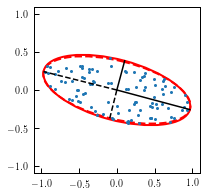

In [226]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Ellipse

ellipse_0 = Ellipse([0,0], a0*2, b0*2, angle=180-theta_0,
                    edgecolor='red', lw=2, facecolor='none', linestyle='-')

ellipse_1 = Ellipse([0,0], a*2, b*2, angle=misalignment_angle,
                    edgecolor='red', lw=2, facecolor='none', linestyle='--')

fig, ax = plt.subplots(1,1, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(coords[:,0], coords[:,1], '.', ms=4)
ax.add_artist(ellipse_0)
ax.add_artist(ellipse_1)

# principle axis
plt.plot([0,e1_0[0]*a0], [0,e1_0[1]*a0], '-', color='black')
plt.plot([0,e2_0[0]*b0], [0,e2_0[1]*b0], '-', color='black')

# principle axis
plt.plot([0,e1[0]*a], [0,e1[1]*a], '--', color='black')
plt.plot([0,e2[0]*b], [0,e2[1]*b], '--', color='black')

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.show()

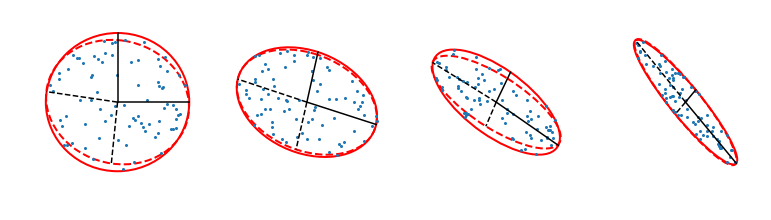

In [250]:
# the image in the readme is produced below

def f(ax, a0, b0, theta_0, n):
    
    coords = sample_ellipsoidal_volume(n, [a0, b0])

    rot = rotation_matrices_from_angles([np.radians(theta_0)])
    coords = rotate_vector_collection(rot,coords)
    ux = np.array([[1.0,0.0]])
    uy = np.array([[0.0,1.0]])
    e1_0 = rotate_vector_collection(rot,ux)[0]
    e2_0 = rotate_vector_collection(rot,uy)[0]

    I = inertia_tensors(coords)
    evals, evecs = np.linalg.eigh(I)
    evals = evals/np.max(evals)

    a = np.sqrt(evals[0,1])
    b = np.sqrt(evals[0,0])

    e1 = evecs[0,1,:]
    e2 = evecs[0,0,:]

    misalignment_angle = np.degrees(angles_between_list_of_vectors(ux,e1))
    
    ellipse_0 = Ellipse([0,0], a0*2, b0*2, angle=180-theta_0,
                    edgecolor='red', lw=2, facecolor='none', linestyle='-')

    ellipse_1 = Ellipse([0,0], a*2, b*2, angle=misalignment_angle,
                    edgecolor='red', lw=2, facecolor='none', linestyle='--')

    ax.plot(coords[:,0], coords[:,1], '.', ms=4)
    ax.add_artist(ellipse_0)
    ax.add_artist(ellipse_1)

    # principle axis
    ax.plot([0,e1_0[0]*a0], [0,e1_0[1]*a0], '-', color='black')
    ax.plot([0,e2_0[0]*b0], [0,e2_0[1]*b0], '-', color='black')

    # principle axis
    ax.plot([0,e1[0]*a], [0,e1[1]*a], '--', color='black')
    ax.plot([0,e2[0]*b], [0,e2[1]*b], '--', color='black')

    ax.set_xlim([-1.1,1.1])
    ax.set_ylim([-1.1,1.1])
    
    ax.set_axis_off()

plt.show()

fig, ax = plt.subplots(1,4, figsize=(2.8*4,3.3))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9)

a = [1,1,1,1]
b = [0.8,0.6,0.4,0.2]
theta = [0,15,30,45]

for i in range(4):
    f(ax[i], a[i], b[i], theta[i], 80)

plt.show()

fig.savefig('./ellipses_plot.png', dpi=250)